In [1]:
import numpy as np
import jax
import jax.numpy as jnp
from jax import vmap
import matplotlib.pyplot as plt
from qdots_qll.models import game


In [2]:
model = game.physical_model()
true_pars = game.true_pars

In [23]:
times = jnp.linspace(0, 100, 1000)

In [24]:
model.fim(true_pars, times[3])

Array([[ 0.00387251,  0.00187493, -0.00112247,  0.00076165],
       [ 0.00187493,  0.00403836, -0.00169155,  0.00100559],
       [-0.00112247, -0.00169155,  0.00660416, -0.00128189],
       [ 0.00076165,  0.00100559, -0.00128189,  0.00354822]],      dtype=float32)

In [25]:
det_fim_times = vmap(lambda a: jnp.linalg.det(model.fim(true_pars, a)), in_axes=(0))(times)

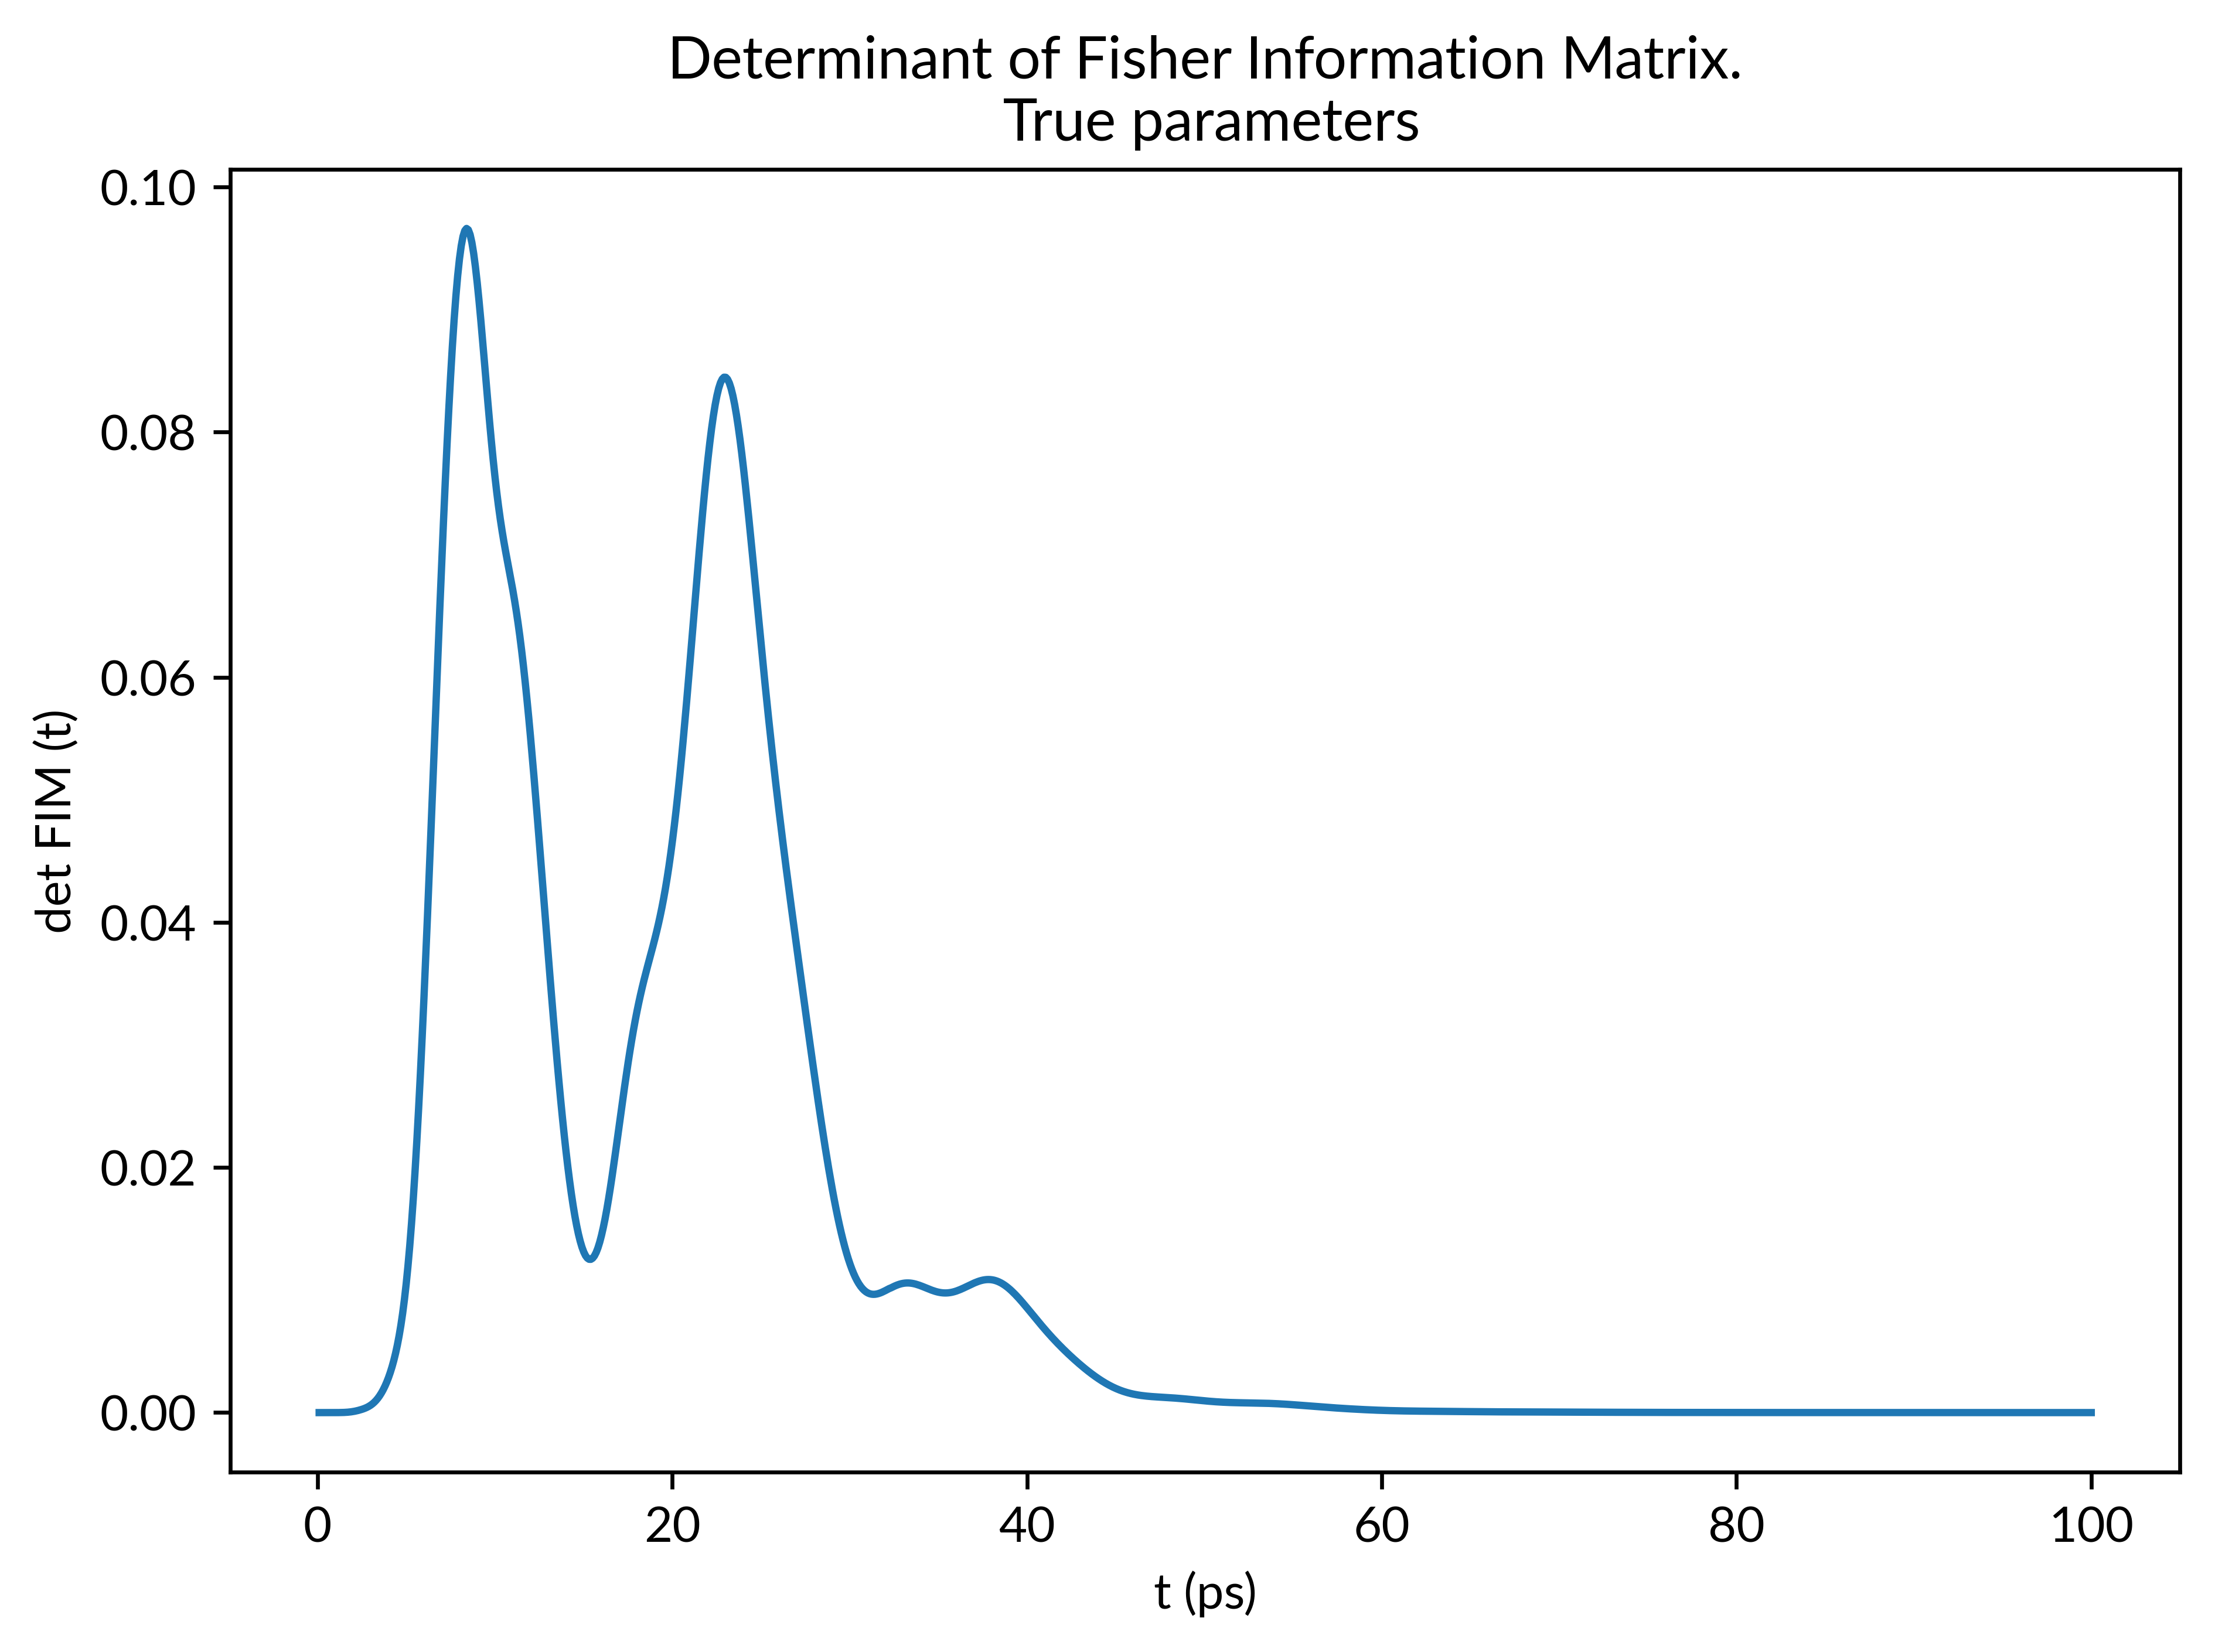

In [29]:
import matplotlib

import matplotlib.font_manager as font_manager

# Add every font at the specified location
font_dir = ['/Users/darioradecic/Downloads/Merriweather']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# font_manager.get_font_names()


from matplotlib import rcParams
rcParams['font.family'] = 'Lato'




plt.figure(dpi=600)
plt.plot(times, det_fim_times)
plt.xlabel("t (ps)")
plt.ylabel("det FIM (t)")
plt.title("Determinant of Fisher Information Matrix.\n True parameters")
plt.tight_layout()

plt.savefig("determinant_FIM_true.pdf", dpi=600)
plt.show()

In [15]:
times = jnp.linspace(0, 100, 1000)

f = lambda t: jnp.diag(model.fim(true_pars, t))

diags_fim = jax.vmap(f)(times)



In [17]:
names_true = [
    "$\\gamma ( - \\eta)$",
    "$\\gamma ( + \\eta)$",
    "$S ( - \\eta)$",
    "$S ( +\\eta)$",
]

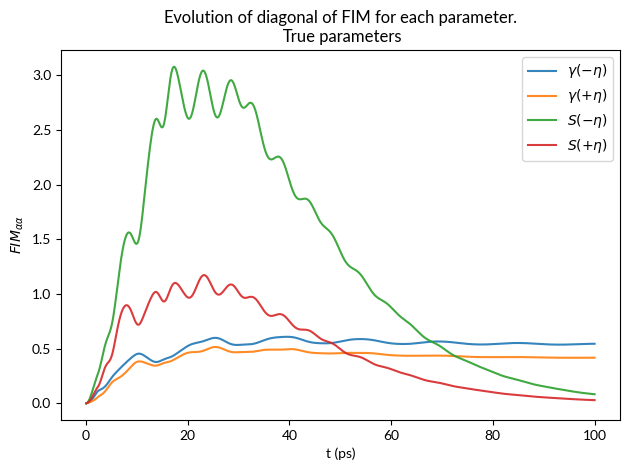

In [31]:
for i in range(4):
    plt.plot(times, diags_fim[:, i], "-", label=names_true[i], alpha=0.9)



plt.legend()
plt.xlabel("t (ps)")
plt.ylabel("$FIM _{\\alpha \\alpha}$")
plt.title("Evolution of diagonal of FIM for each parameter.\n True parameters")
plt.tight_layout()
plt.savefig("FIM_each_par_true.pdf", dpi=600)

plt.show()

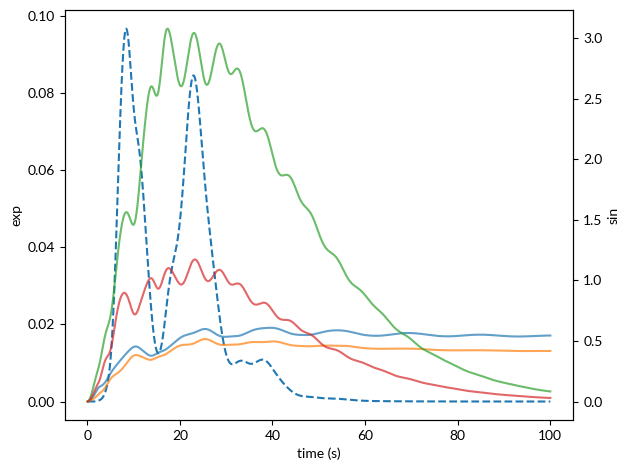

In [38]:
fig, ax1 = plt.subplots()

# color = 'tab:red'
ax1.set_xlabel("time (s)")
ax1.set_ylabel(
    "exp",
)
ax1.plot(
    times,
    det_fim_times,
    "--",
)
ax1.tick_params(
    axis="y",
)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'

ax2.set_ylabel(
    "sin",
)  # we already handled the x-label with ax1
for i in range(4):
    ax2.plot(times, diags_fim[:, i], "-", label=names_true[i], alpha=0.7)

# ax2.plot(t, data2, color=color)
ax2.tick_params(axis="y")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()